# Explore here

In [30]:
# time series
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pmdarima as pm

from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf



In [31]:
# Load the dataset 
url = "https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv"
df = pd.read_csv(url)
df.head(10)


,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
5,2022-09-08 17:10:08.079328,60.081865
6,2022-09-09 17:10:08.079328,68.466704
7,2022-09-10 17:10:08.079328,67.765106
8,2022-09-11 17:10:08.079328,70.512261
9,2022-09-12 17:10:08.079328,74.656453


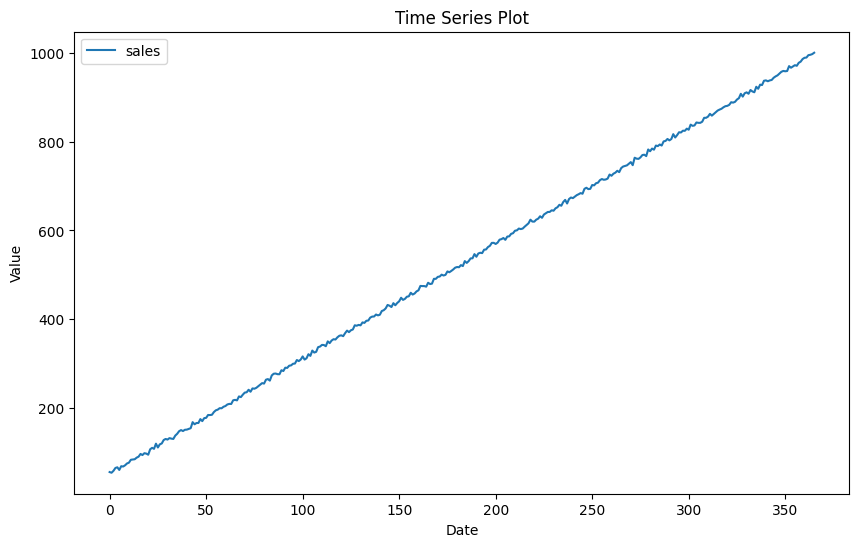

In [32]:
df.plot(figsize=(10, 6))
plt.title("Time Series Plot")
plt.xlabel("Date")
plt.ylabel("Value")
plt.show()


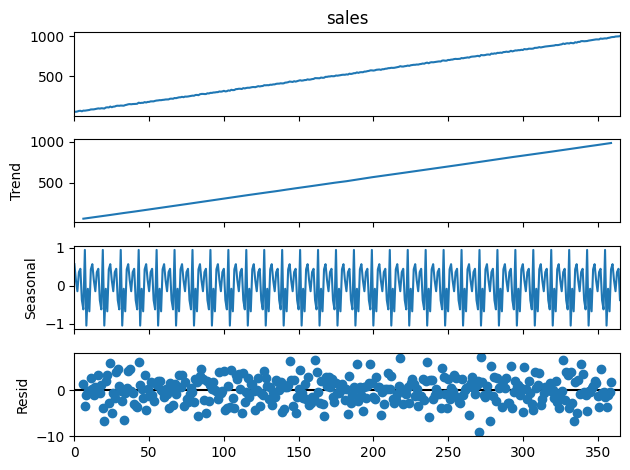

In [33]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['sales'], model='additive', period=12)
decomposition.plot()
plt.show()


In [34]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df['sales'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")


ADF Statistic: 0.545414193706373
p-value: 0.9861899815311063


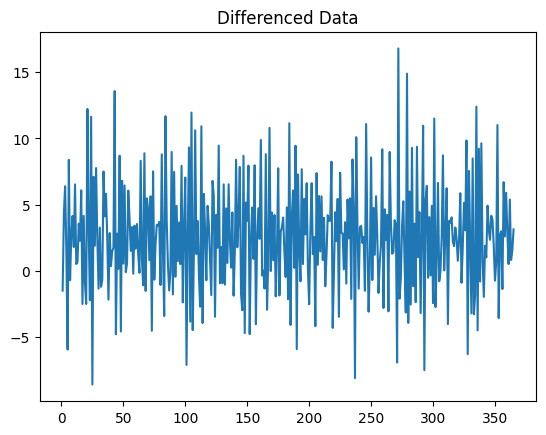

In [35]:
# Apply differencing if necessary
diff_series = df['sales'].diff().dropna()
diff_series.plot(title="Differenced Data")
plt.show()


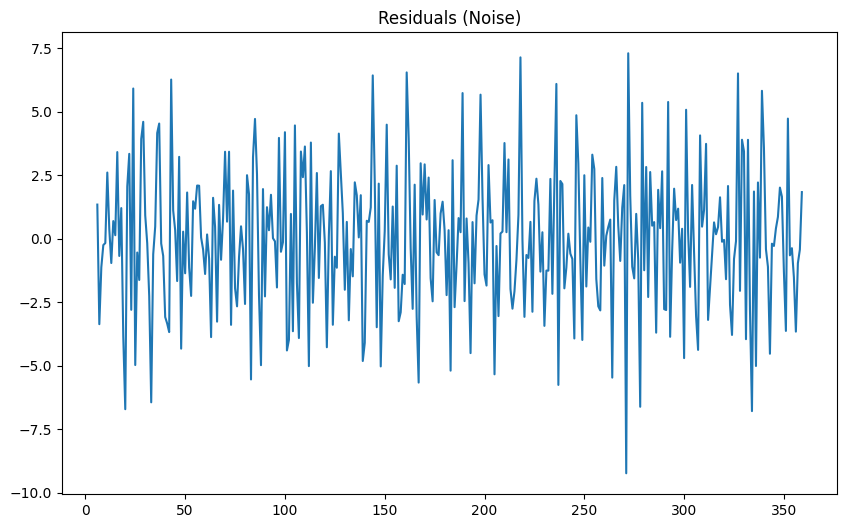

In [36]:
residual = decomposition.resid
residual.plot(figsize=(10, 6))
plt.title("Residuals (Noise)")
plt.show()


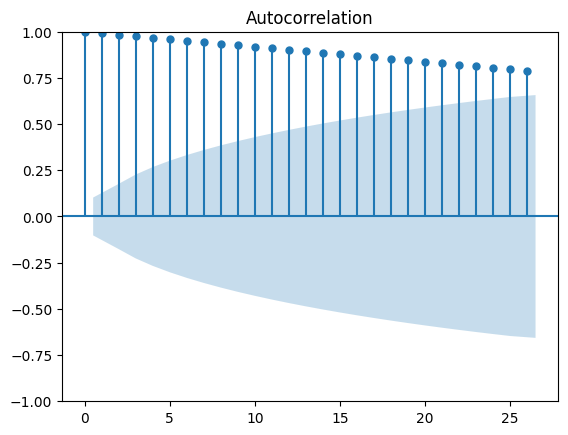

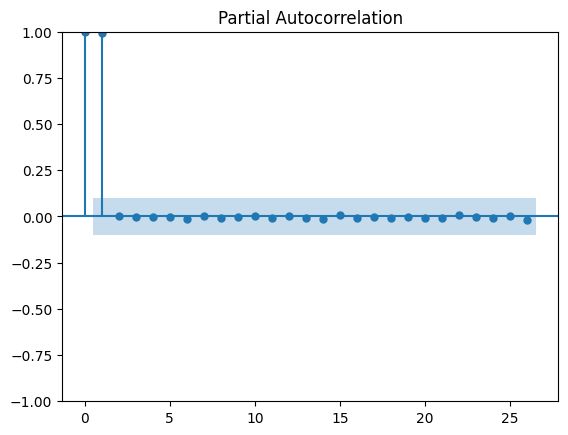

In [37]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df['sales'])
plot_pacf(df['sales'])
plt.show()


In [38]:
# Split the data into x and y 
#X = df.drop('sales', axis=1)  # All columns except 'y'
#y = df['sales']  # The target variable (subscription outcome)

In [39]:
#X.shape

In [40]:
#y.shape 

In [41]:
# Split data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [42]:
#Train an ARIMA 

# Define p, d, q
p, d, q = 1, 1, 1  # Example values; adjust based on your analysis

# Fit ARIMA model
model = ARIMA(df['sales'], order=(p, d, q))
model_fit = model.fit()

# Summary of the model
print(model_fit.summary())


                               SARIMAX Results                                
Dep. Variable:                  sales   No. Observations:                  366
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1049.226
Date:                Fri, 20 Dec 2024   AIC                           2104.453
Time:                        22:59:42   BIC                           2116.153
Sample:                             0   HQIC                          2109.103
                                - 366                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.001   1194.486      0.000       0.998       1.002
ma.L1         -0.9996      0.679     -1.471      0.141      -2.331       0.332
sigma2        18.1401     12.421      1.460      0.1

/home/vscode/.local/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


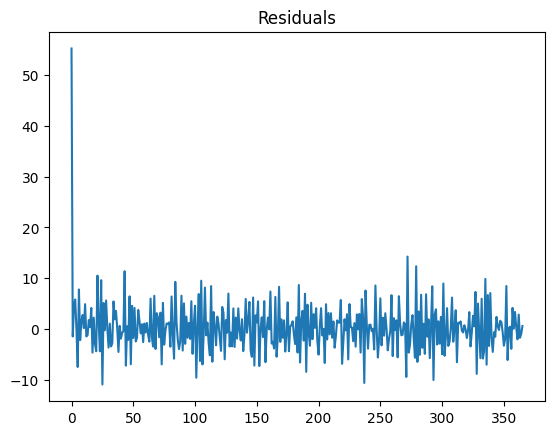

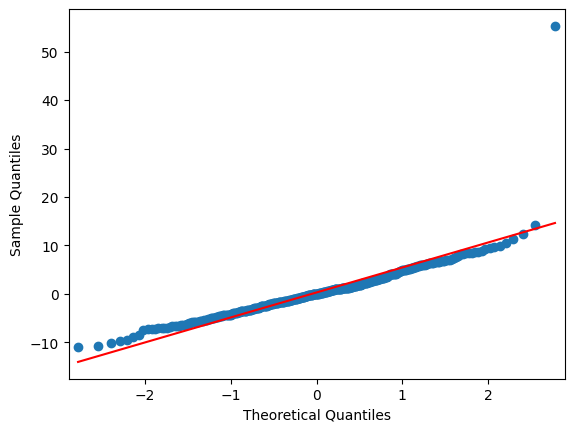

In [43]:
# Plot residuals
residuals = model_fit.resid
residuals.plot(title="Residuals")
plt.show()

# Residual diagnostics
from statsmodels.graphics.gofplots import qqplot

qqplot(residuals, line='s')
plt.show()


In [44]:
# Forecast future values
forecast = model_fit.forecast(steps=10)
print(forecast)


366    1003.052927
367    1005.623068
368    1008.193209
369    1010.763350
370    1013.333489
371    1015.903628
372    1018.473766
373    1021.043903
374    1023.614040
375    1026.184176
Name: predicted_mean, dtype: float64
